# Exploratory Data Analysis

This notebook focuses on the exploratory analysis of the `NYS Oil & Gas Wells` dataset. It aims to uncover initial insights and patterns through visualizations and statistical summaries by understanding feature distributions and examining relationships between features.

By the end of this notebook, we will have a thorough understanding of the dataset’s characteristics and the interactions between features, setting the stage for effective model development.

### Loading Tools and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

df = pd.read_csv('../data/clean_gaswells.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377 entries, 0 to 7376
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gas_log1p  7377 non-null   float64
 1   well       7377 non-null   object 
 2   status     7377 non-null   object 
 3   depth      7377 non-null   float64
 4   elevation  7377 non-null   float64
 5   longitude  7377 non-null   float64
 6   latitude   7377 non-null   float64
 7   field      7377 non-null   object 
 8   geology    7377 non-null   object 
dtypes: float64(5), object(4)
memory usage: 518.8+ KB
None


,gas_log1p,well,status,depth,elevation,longitude,latitude,field,geology
0,8.56,OD,IN,"1,252.00","2,192.00",-77.77,42.06,Beech Hill-Independence,Fulmer Valley
1,5.47,OD,IN,"1,176.00","2,210.00",-77.75,42.08,Beech Hill-Independence,Fulmer Valley
2,4.11,OD,IN,"2,071.00","2,177.08",-77.77,42.08,Beech Hill-Independence,Fulmer Valley
3,8.14,OD,AC,"1,247.00","2,225.00",-77.75,42.08,Beech Hill-Independence,Fulmer Valley
4,8.00,OD,PA,"1,267.00","2,240.00",-77.76,42.07,Beech Hill-Independence,Fulmer Valley


## Feature Understanding

*Plotting Feature Distributions*
- Histogram
- KDE
- Boxplot


---------------
FEATURE: GAS_LOG1P
---------------


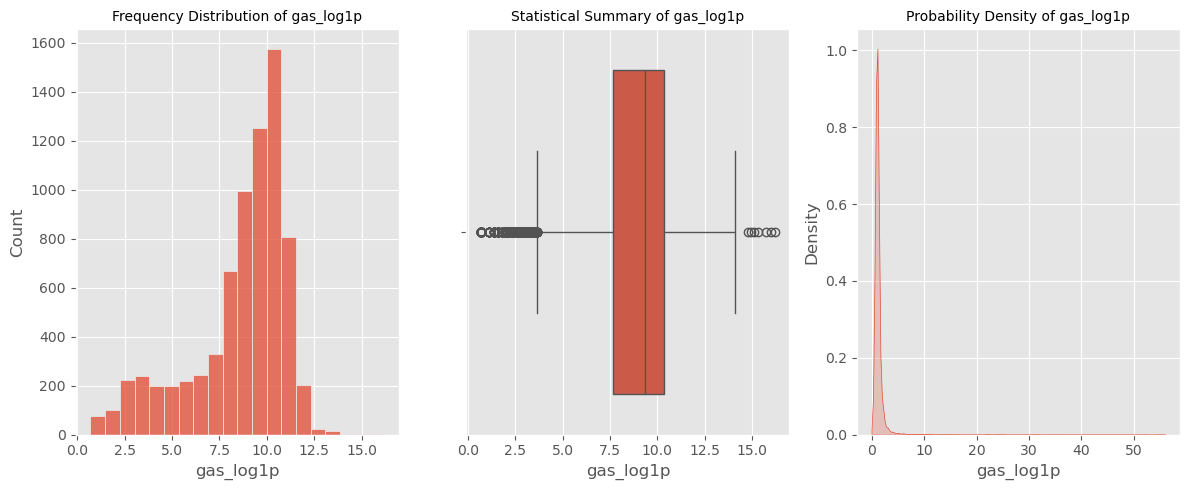


---------------
FEATURE: WELL
---------------


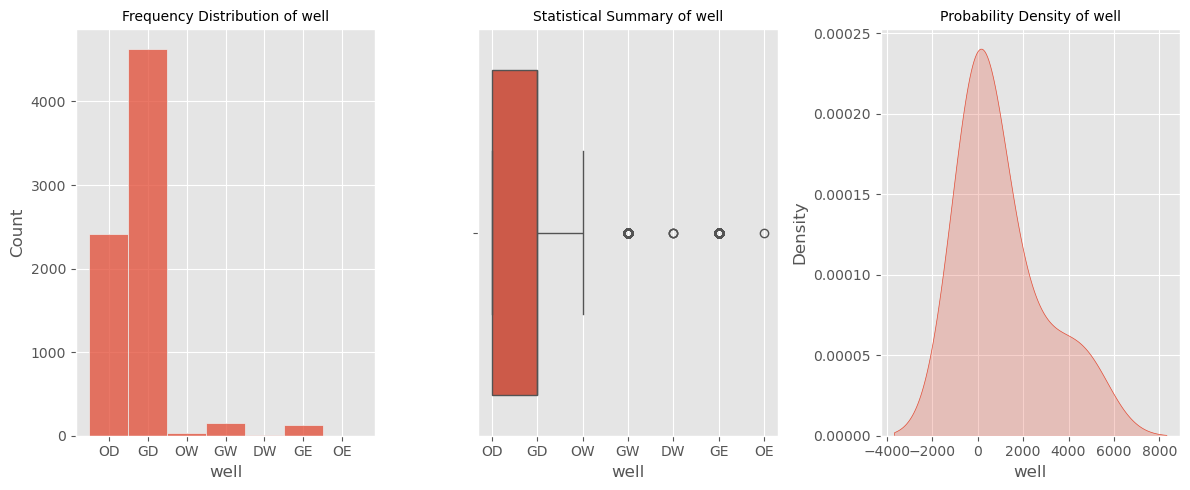


---------------
FEATURE: STATUS
---------------


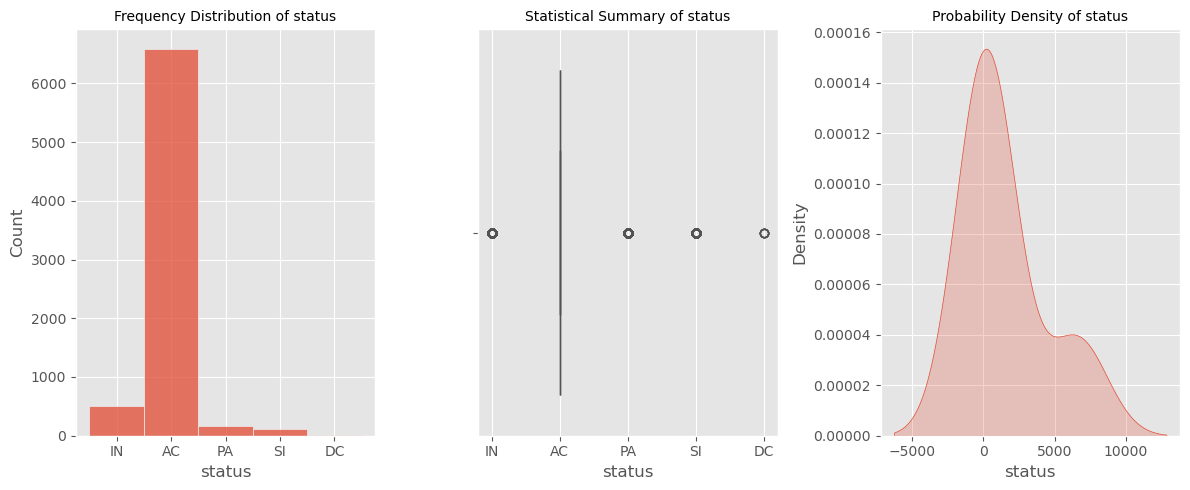


---------------
FEATURE: DEPTH
---------------


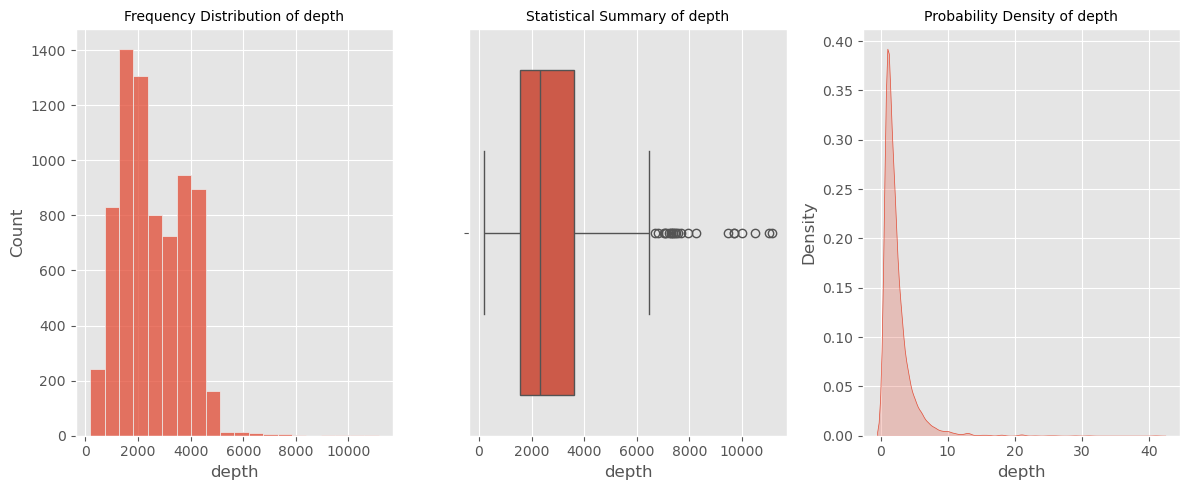


---------------
FEATURE: ELEVATION
---------------


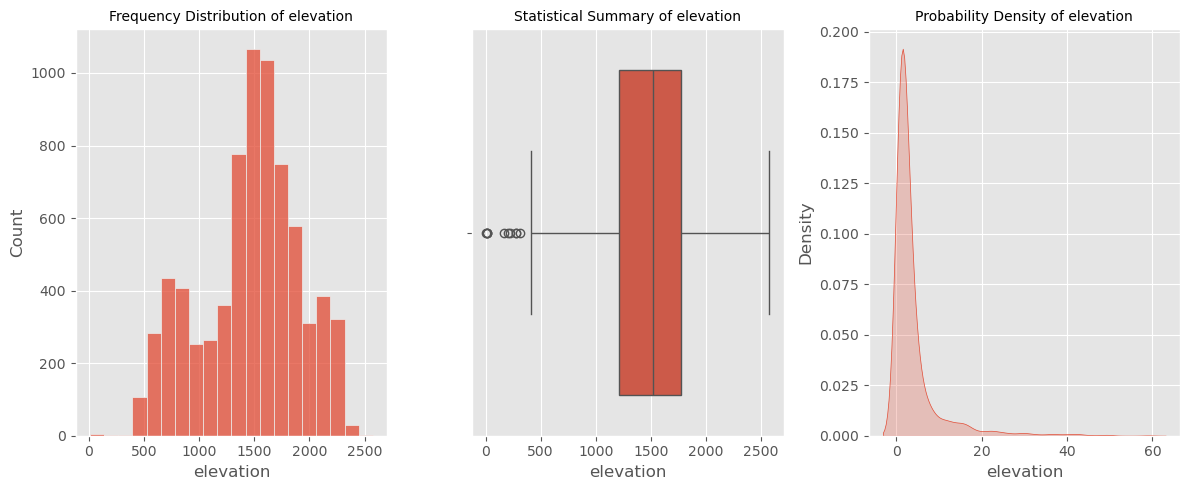


---------------
FEATURE: LONGITUDE
---------------


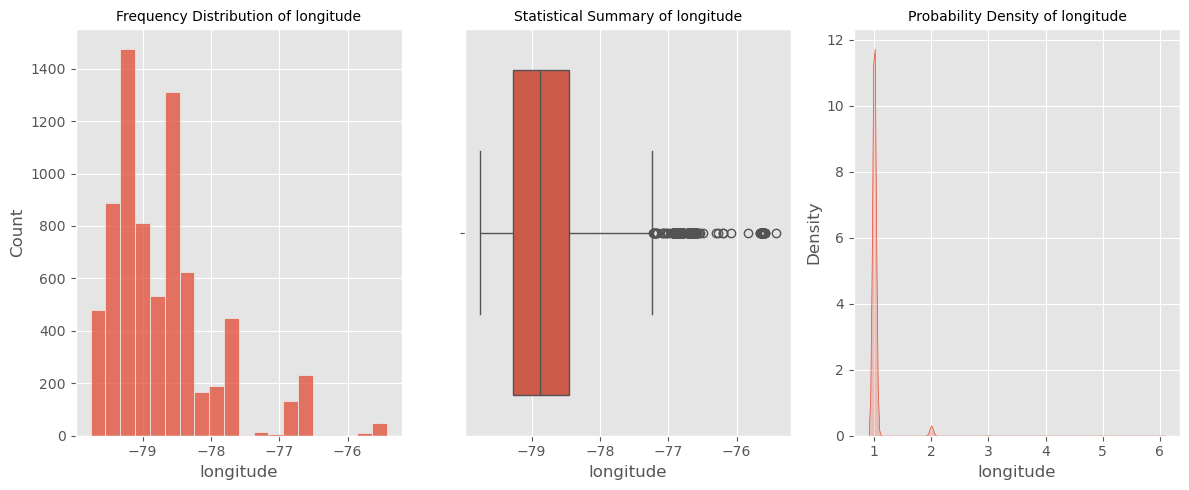


---------------
FEATURE: LATITUDE
---------------


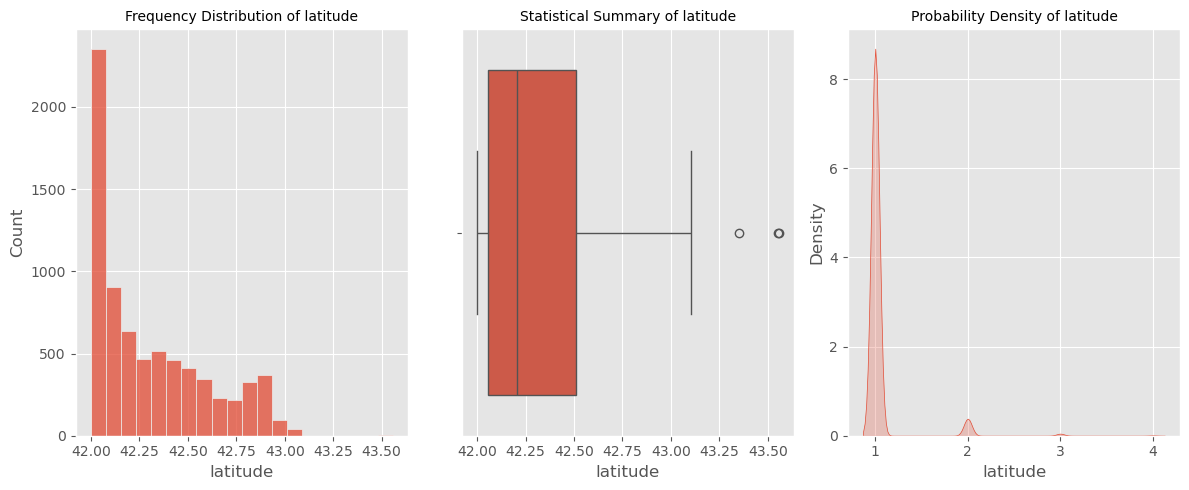


---------------
FEATURE: FIELD
---------------


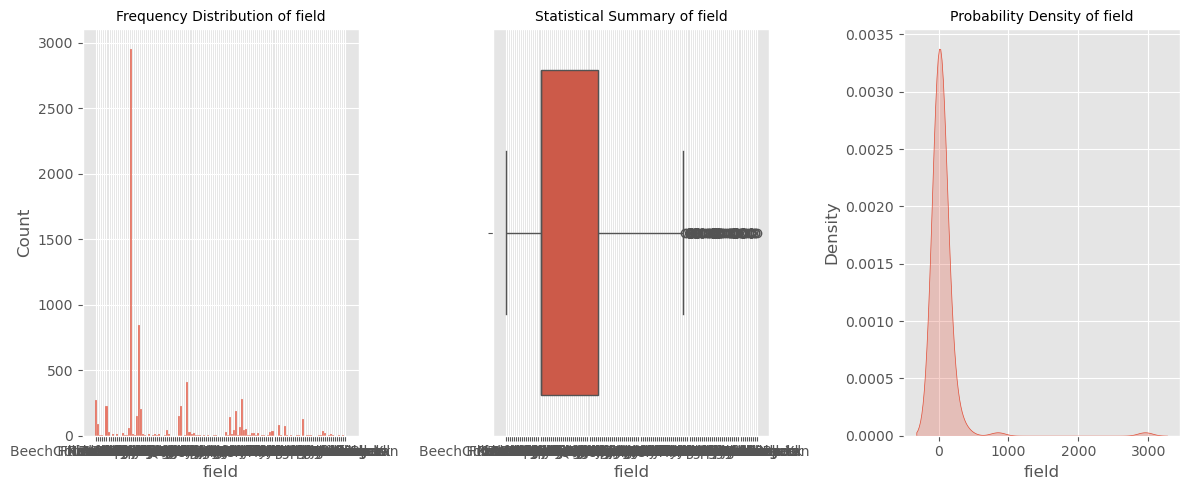


---------------
FEATURE: GEOLOGY
---------------


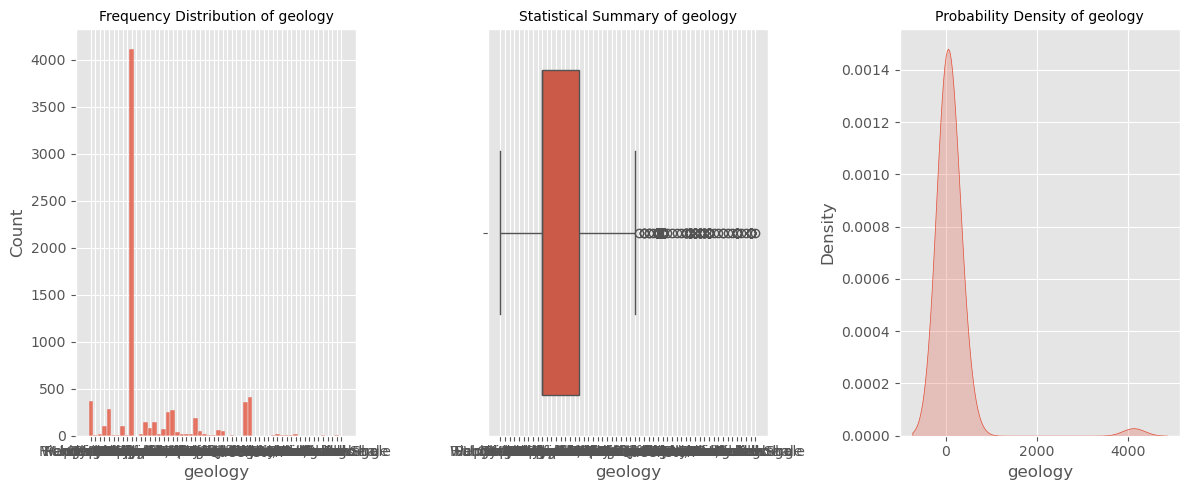

In [2]:
for column in df.columns:
    print()
    print('---------------')
    print(f'FEATURE: {column.upper()}')
    print('---------------')
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,5))
    sns.histplot(ax=ax1, data=df[column], kde=False, bins=20)
    ax1.set_title(f'Frequency Distribution of {column}', fontsize=10)
    ax1.set_xlabel(column)
    
    sns.boxplot(ax=ax2, x=df[column])
    ax2.set_title(f'Statistical Summary of {column}', fontsize=10)
    ax2.set_xlabel(column)

    sns.kdeplot(ax=ax3, data=df[column].value_counts(), shade=True)
    ax3.set_title(f'Probability Density of {column}', fontsize=10)
    ax3.set_xlabel(column)
    
    plt.tight_layout()
    plt.show()

## Feature Relationships
- Scatterplot
- Pairplot
- Heatmap Correlation
- Lineplots / Time
- Groupby Comparisons

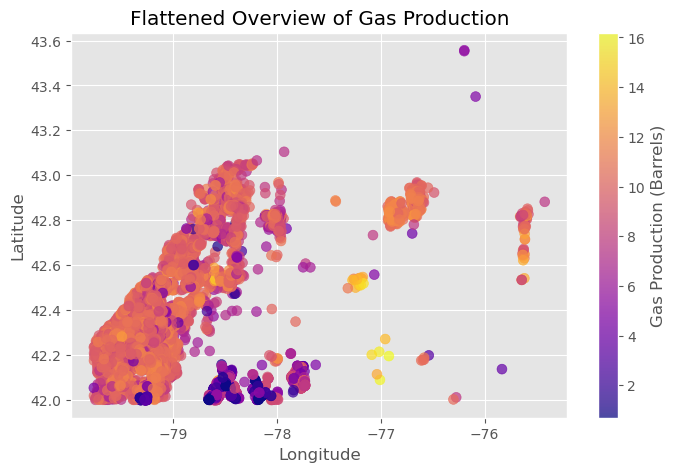

In [3]:
fig, ax = plt.subplots(1, figsize=(8,5))
corr_plot = ax.scatter(np.array(df['longitude']), np.array(df['latitude']), 
                       s=50, c=np.array(df['gas_log1p']).flatten(), cmap='plasma', alpha=0.7)
plt.colorbar(corr_plot).set_label('Gas Production (Barrels)')
plt.title('Flattened Overview of Gas Production')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
plt.close()

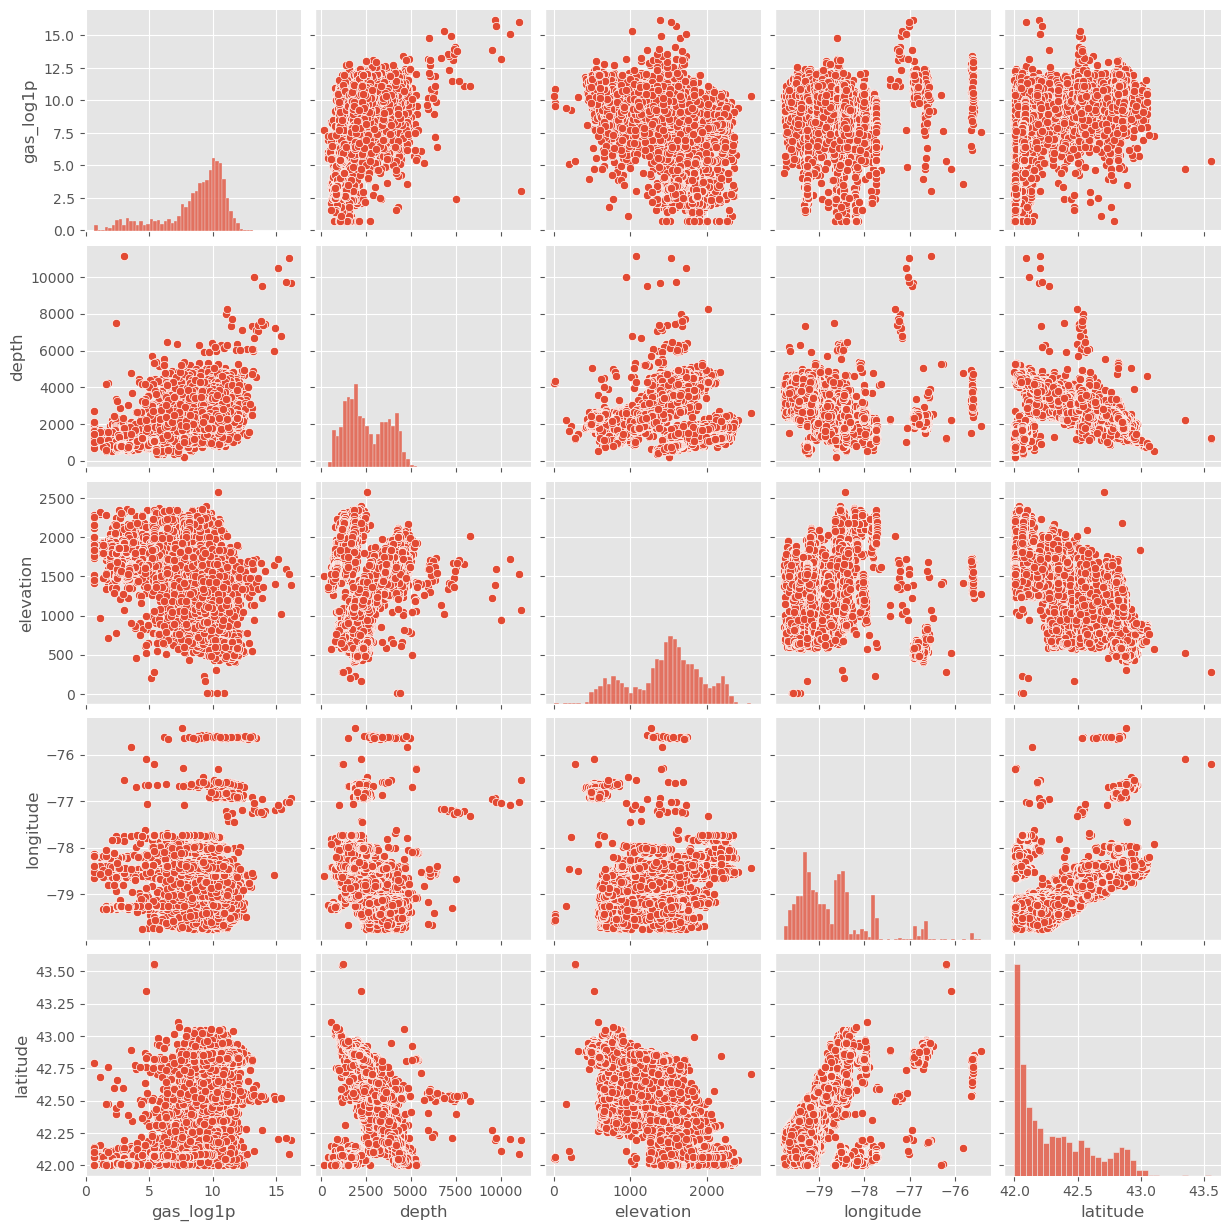

In [4]:
sns.pairplot(df)
plt.show()
plt.close()

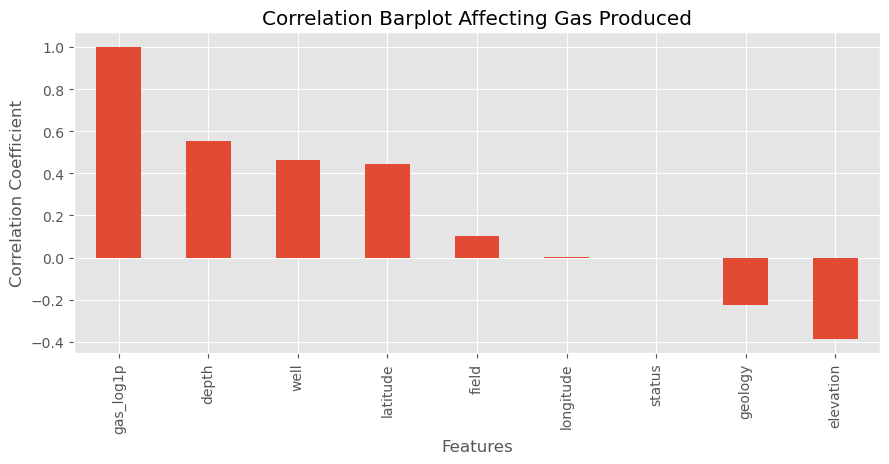

In [5]:
corr = df.copy()
label_mapping = {}

for column in corr.columns:
    if corr[column].dtype == 'O':
        unique_values = corr[column].unique()
        mapping = {value: i + 1 for i, value in enumerate(unique_values)}
        label_mapping[column] = mapping
        corr[column] = corr[column].map(mapping)

corr.corr()['gas_log1p'].sort_values(ascending=False).plot(kind='bar', figsize=(9,5))
plt.title('Correlation Barplot Affecting Gas Produced')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()
plt.close()

In [6]:
corr.corr()

,gas_log1p,well,status,depth,elevation,longitude,latitude,field,geology
gas_log1p,1.00,0.47,-0.00,0.55,-0.38,0.00,0.44,0.10,-0.22
well,0.47,1.00,0.00,0.46,-0.44,0.08,0.51,0.25,0.07
status,-0.00,0.00,1.00,0.02,0.03,0.02,-0.03,-0.03,-0.00
depth,0.55,0.46,0.02,1.00,-0.01,-0.32,-0.01,-0.17,-0.23
elevation,-0.38,-0.44,0.03,-0.01,1.00,-0.01,-0.75,-0.50,-0.25
longitude,0.00,0.08,0.02,-0.32,-0.01,1.00,0.35,0.29,0.30
latitude,0.44,0.51,-0.03,-0.01,-0.75,0.35,1.00,0.69,0.13
field,0.10,0.25,-0.03,-0.17,-0.50,0.29,0.69,1.00,0.37
geology,-0.22,0.07,-0.00,-0.23,-0.25,0.30,0.13,0.37,1.00


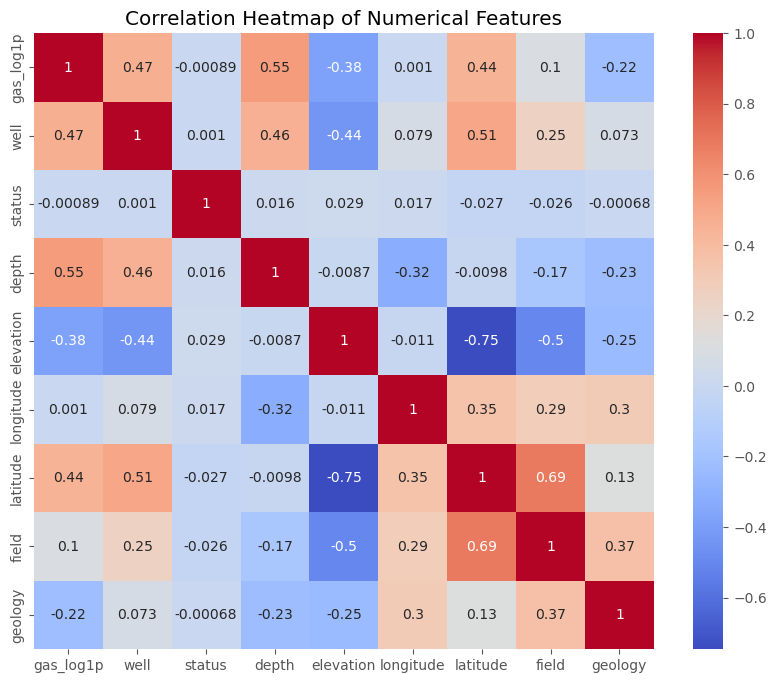

(None, None)

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show(), plt.close()

#### Groupby Comparisons

In [8]:
df.gas_log1p.describe()

count   7,377.00
mean        8.58
std         2.56
min         0.69
25%         7.68
50%         9.36
75%        10.36
max        16.19
Name: gas_log1p, dtype: float64

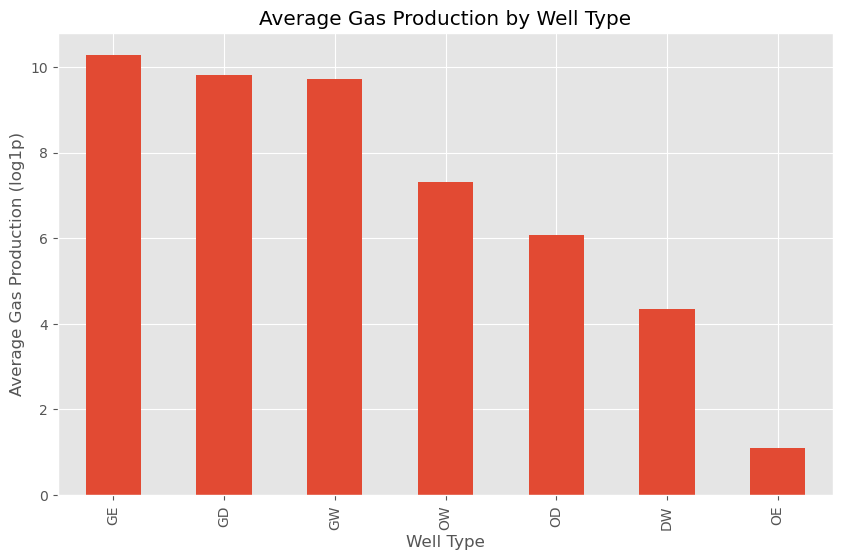

In [9]:
gas_by_well_type = df.groupby('well')['gas_log1p'].mean().sort_values(ascending=False)
gas_by_well_type.plot(kind='bar', figsize=(10, 6))
plt.title('Average Gas Production by Well Type')
plt.ylabel('Average Gas Production (log1p)')
plt.xlabel('Well Type')
plt.show()

## Script

In [10]:
try:
    print('Script executed successfully.')
except:
    print('FAILED')

Script executed successfully.
